In [4]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [5]:
# Load csv file
points_df = pd.read_csv("2017_2022_epl_squad.csv", encoding = "latin-1")
points_df

,Year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


In [6]:
# Examine shape of dataset
points_df.shape

(100, 17)

In [7]:
# Check the columns that contain NaN values
points_df.isnull().any()

Year          False
Rk            False
Squad         False
MP            False
W             False
D             False
L             False
GF            False
GA            False
GD            False
Pts           False
Pts/MP        False
xG            False
xGA           False
xGD           False
xGD/90        False
Attendance    False
dtype: bool

In [8]:
# Convert categorical data to numerical
le = LabelEncoder()

points_df2 = points_df.copy()
points_df2["Year_Enc"]= le.fit_transform(points_df2["Year"])
points_df2["Squad_Enc"] = le.fit_transform(points_df2["Squad"])
points_df2

,Year,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Year_Enc,Squad_Enc
0,2017_2018,1,Manchester City,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070,0,15
1,2017_2018,2,Manchester Utd,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976,0,16
2,2017_2018,3,Tottenham,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953,0,23
3,2017_2018,4,Liverpool,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049,0,14
4,2017_2018,5,Chelsea,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,16,Everton,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446,4,9
96,2021_2022,17,Leeds United,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308,4,12
97,2021_2022,18,Burnley,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278,4,5
98,2021_2022,19,Watford,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614,4,24


In [9]:
# Re-arrange columns
print(list(points_df2))

points_df3 = points_df2[['Year', 'Year_Enc', 'Rk', 'Squad', 'Squad_Enc', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']]
points_df3

['Year', 'Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance', 'Year_Enc', 'Squad_Enc']


,Year,Year_Enc,Rk,Squad,Squad_Enc,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance
0,2017_2018,0,1,Manchester City,15,38,32,4,2,106,27,79,100,2.63,86.4,22.8,63.6,1.67,54070
1,2017_2018,0,2,Manchester Utd,16,38,25,6,7,68,28,40,81,2.13,60.7,41.7,18.9,0.50,74976
2,2017_2018,0,3,Tottenham,23,38,23,8,7,74,36,38,77,2.03,67.3,35.0,32.3,0.85,67953
3,2017_2018,0,4,Liverpool,14,38,21,12,5,84,38,46,75,1.97,72.8,34.0,38.8,1.02,53049
4,2017_2018,0,5,Chelsea,7,38,21,7,10,62,38,24,70,1.84,57.9,35.3,22.7,0.60,41282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021_2022,4,16,Everton,9,38,11,6,21,43,66,-23,39,1.03,42.8,54.5,-11.7,-0.31,38446
96,2021_2022,4,17,Leeds United,12,38,9,11,18,42,79,-37,38,1.00,47.2,70.1,-23.0,-0.60,36308
97,2021_2022,4,18,Burnley,5,38,7,14,17,34,53,-19,35,0.92,39.0,56.7,-17.7,-0.47,19278
98,2021_2022,4,19,Watford,24,38,6,5,27,34,77,-43,23,0.61,38.8,66.6,-27.8,-0.73,20614


In [10]:
# Statistical details of the dataset
points_df2[["Year_Enc", "Squad_Enc","W", "D", "L", "GF", "GA", "GD", "Pts"]].describe()

,Year_Enc,Squad_Enc,W,D,L,GF,GA,GD,Pts
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2.000000,13.400000,14.670000,8.660000,14.670000,52.190000,52.190000,0.000000,52.670000
std,1.421338,8.086652,6.559833,3.082109,5.872475,18.511091,13.441752,29.718545,18.510742
min,0.000000,0.000000,3.000000,2.000000,1.000000,20.000000,22.000000,-61.000000,16.000000
25%,1.000000,7.000000,10.000000,7.000000,11.000000,39.000000,43.750000,-20.000000,40.000000
50%,2.000000,14.000000,13.500000,8.500000,15.000000,48.000000,53.000000,-4.500000,49.500000
75%,3.000000,20.000000,19.000000,11.000000,18.250000,62.250000,61.250000,16.500000,65.250000
max,4.000000,27.000000,32.000000,15.000000,29.000000,106.000000,84.000000,79.000000,100.000000


<AxesSubplot:>

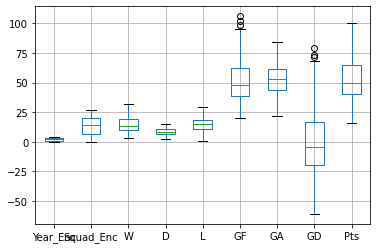

In [11]:
# Visualizing the dataset
points_df2.boxplot(["Year_Enc", "Squad_Enc","W", "D", "L", "GF", "GA", "GD", "Pts"])

In [12]:
# Divide the data into “attributes” and “labels”
X = points_df2[["Year_Enc","Squad_Enc", "GD"]].values

y = points_df2["L"].values

c:\Users\sefah\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='L', ylabel='Density'>

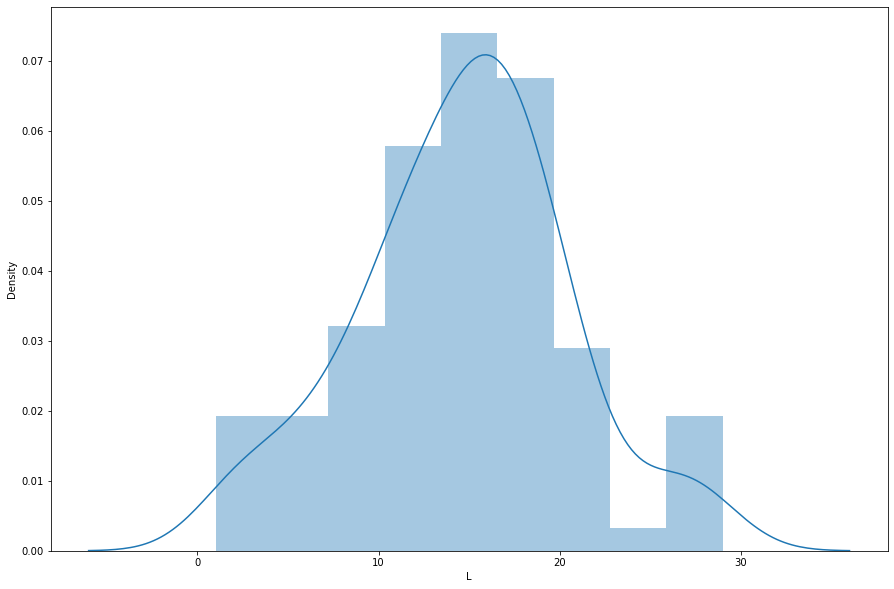

In [13]:
# Check the average value of the output column
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(points_df2['L'])

In [14]:
# Split the data to training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
#Train our model
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Generate prediction
y_pred = model.predict(X_test)

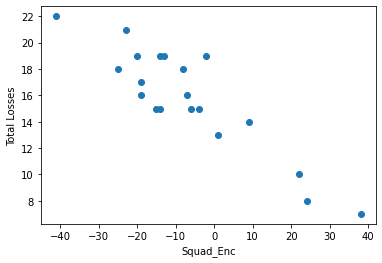

In [17]:
plt.scatter(X_test[:,2], y_test)
plt.xlabel("Squad_Enc")
plt.ylabel("Total Losses")
# plt.plot(y_test, y_pred, color='red')
plt.show()

In [18]:
# To retrieve the intercept:
print(model.intercept_)

# For retrieving the slope:
print(model.coef_)

# For R-squared
r2 = metrics.r2_score(y_test, y_pred); r2

14.833714025970108
[-0.1177117   0.00792947 -0.18332681]


0.7778190917454376

In [19]:
# Create a squad points dataframe
Teams = pd.DataFrame(points_df, columns=["Squad", "Pts"])

In [20]:
# Difference between the actual value and predicted value
points_df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# points_df3 = pd.DataFrame({'Teams': array, 'Actual': y, 'Predicted': y_pred}).dropna()

points_df4 = points_df3.head(20)
points_df4.sort_values(by='Predicted',ascending=False)

,Actual,Predicted
12,22,22.195215
7,18,19.127185
13,19,18.690558
9,21,18.650749
6,16,18.475513
10,17,18.144936
14,15,17.471655
8,15,17.379911
18,19,17.298437
3,19,17.187706


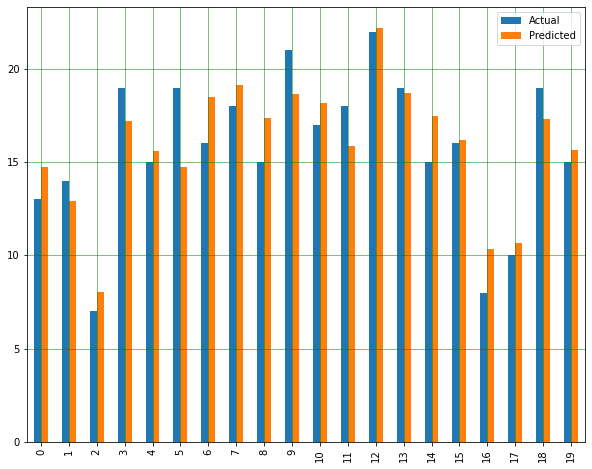

In [21]:
# Comparison of Actual and Predicted values
points_df4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()